In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
tips = sns.load_dataset('tips')

In [7]:
day_total = tips.groupby('day', as_index=False)['total_bill'].sum()
day_total

,day,total_bill
0,Thur,1096.33
1,Fri,325.88
2,Sat,1778.40
3,Sun,1627.16


In [8]:
type(day_total)

pandas.core.frame.DataFrame

Text(0, 0.5, 'Total Bill')

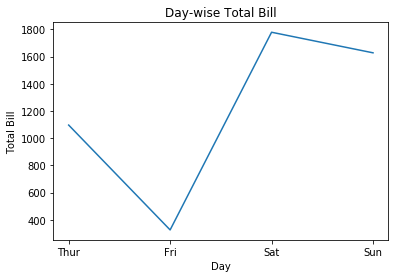

In [11]:
plt.plot(day_total['day'], day_total['total_bill'])
plt.title("Day-wise Total Bill")
plt.xlabel("Day")
plt.ylabel("Total Bill")

Text(0, 0.5, 'Total Bill')

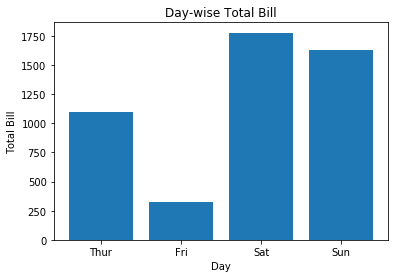

In [14]:
plt.bar(day_total['day'], day_total['total_bill'])
plt.title("Day-wise Total Bill")
plt.xlabel("Day")
plt.ylabel("Total Bill")

Text(0.5, 1.0, 'Day-wise Total Bill')

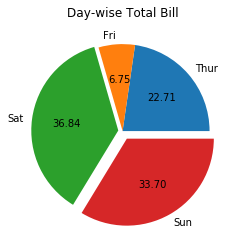

In [22]:
plt.pie(day_total['total_bill'], labels = day_total['day'], autopct ="%.2f", explode = (0,0,.05,0.1))
plt.title("Day-wise Total Bill")

(0, 15)

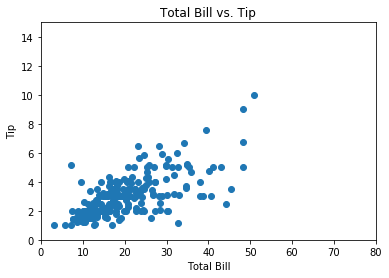

In [26]:
plt.scatter( tips['total_bill'], tips['tip'])
plt.title("Total Bill vs. Tip")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.xlim((0,80))
plt.ylim((0,15))

## Object API

Text(0, 0.5, 'Total Bill')

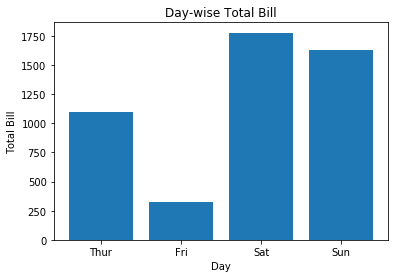

In [30]:
ax = plt.subplot()
ax.bar(day_total['day'], day_total['total_bill'])
ax.set_title("Day-wise Total Bill")
ax.set_xlabel("Day")
ax.set_ylabel("Total Bill")

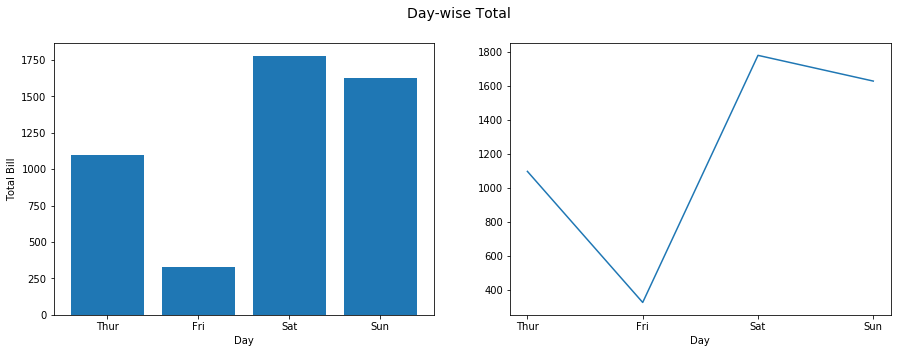

In [43]:
fig,ax = plt.subplots(1,2)
fig.suptitle('Day-wise Total', fontsize=14)
fig.set_size_inches(15,5)
ax[0].bar(day_total['day'], day_total['total_bill'])
# ax[0].set_title("Day-wise Total Bill")
ax[0].set_xlabel("Day")
ax[0].set_ylabel("Total Bill")

ax[1].plot(day_total['day'], day_total['total_bill'])
# ax[1].set_title("Day-wise Total Bill")
ax[1].set_xlabel("Day")
fig.savefig("day_total.jpg")